In [1]:
import os
import glob
import pandas as pd
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', -1)
sns.set_theme()

In [2]:
def plot_bin_population_heatmap(population, feature_names,show=True,save=False,output_folder=None,data_name=None, filtering=False):
    """
    :param population: a list where each element is a list of specified features
    :param feature_list: an alphabetically sorted list containing each of the possible feature
    """
    
    bin_names = []
    for i in range(len(population)):
        bin_names.append("Imp " + str(i + 1))

    feature_index_map = {}
    for i in range(len(feature_names)):
        feature_index_map[feature_names[i]] = i #create feature to index mapping

    graph_df = []
    for bin in population:
        temp_arr = [0] * len(feature_names)
        for feature in bin:
            temp_arr[feature_index_map[feature]] = 1
        graph_df.append(temp_arr)

    graph_df = pd.DataFrame(graph_df, bin_names, feature_names)

    if filtering:
        tdf = graph_df
        tdf = pd.DataFrame(tdf.sum(axis=0), columns=['Count']).sort_values('Count', ascending=False)
        tdf = tdf[tdf['Count'] >= 4]
        graph_df = graph_df[list(tdf.index)]

    num_bins = len(population) 
    max_bins = 100
    max_features = 100
    # iterate through df columns and adjust values as necessary
    if num_bins > max_bins:  #
        if len(feature_names) > max_features: #over max bins and max features - fixed plot with no labels
            # fig_size = (max_features // 2, max_bins // 2)
            # Create a heatmap using Seaborn
            # plt.subplots(figsize=fig_size)
            sns.heatmap(graph_df, xticklabels=False, yticklabels=False, vmax=1, vmin=0,
                        square=True, cmap="Blues", cbar_kws={"shrink": .75}, cbar=False)
        else: #Over max bins, but under max features
            # fig_size = (len(feature_names)// 2, max_bins  // 2)
            # Create a heatmap using Seaborn
            # plt.subplots(figsize=fig_size)
            sns.heatmap(graph_df, yticklabels=False, vmax=1, vmin=0,
                        square=True, cmap="Blues", cbar_kws={"shrink": .75}, cbar=False)
    else:
        if len(feature_names) > max_features: #under max bins but over max features 
            # fig_size = (max_features, num_bins)
            # Create a heatmap using Seaborn
            # plt.subplots(figsize=fig_size)
            sns.heatmap(graph_df, xticklabels=1, yticklabels=1, vmax=1, vmin=0, square=True, cmap="Blues",
                        cbar_kws={"shrink": .75}, cbar=False)
        else:
            print("HERE")
            if filtering:
                fig_size = (len(graph_df.columns)//3, len(graph_df.columns)//3)
            # Create a heatmap using Seaborn
                plt.subplots(figsize=fig_size)
            else:
                fig_size = (num_bins, num_bins)
            # Create a heatmap using Seaborn
                plt.subplots(figsize=fig_size)
            sns.heatmap(graph_df, xticklabels=1, yticklabels=1, vmax=1, vmin=0, square=True, cmap="Blues",
                        cbar_kws={"shrink": .75}, cbar=False)
            
    legend_elements = [mpatches.Patch(color='aliceblue', label='Not in Bin'),
                        mpatches.Patch(color='darkblue', label='Included in Bin')]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Dataset Features')
    plt.ylabel('Top Bin For Imputation')
    if not filtering:
        plt.title('Box Plot for Features in Top Bin for ' + data_name)

    if save and not filtering:
        plt.savefig(output_folder+'/'+'Basic_Pop_Heatmap_'+data_name+'.png', bbox_inches="tight")
    if save and filtering:
        plt.savefig(output_folder+'/'+'Filtered_Pop_Heatmap_'+data_name+'.png', bbox_inches="tight")
    if show:
        plt.show()
    
    return graph_df

In [3]:
experiment_folder = './ASHI_Output_1/'

In [4]:
csv_list = sorted(list(glob.glob(experiment_folder+"*/Pop_*.csv")))
tdf = pd.read_csv(csv_list[0])

In [5]:
df = pd.DataFrame(columns=tdf.columns)
for imp in csv_list:
    tdf = pd.read_csv(imp)
    df = df.append(tdf.iloc[0],ignore_index=True) #top bin
display(df[['adj_HR', 'feature_list']])

,adj_HR,feature_list
0,1.081533,"['MM_DQA1_26', 'MM_DQA1_54', 'MM_DQB1_14', 'MM_DRB1_30', 'MM_DRB1_32', 'MM_DRB1_33', 'MM_DRB1_73', 'MM_DRB1_77']"
1,1.093866,"['MM_DQA1_52', 'MM_DQA1_69', 'MM_DQB1_30', 'MM_DQB1_56', 'MM_DQB1_74', 'MM_DQB1_77', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_32', 'MM_DRB1_47', 'MM_DRB1_58', 'MM_DRB1_74', 'MM_DRB1_85', 'MM_DRB1_9']"
2,1.079980,"['MM_DQB1_14', 'MM_DQB1_30', 'MM_DQB1_77', 'MM_DQB1_9', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_30', 'MM_DRB1_32', 'MM_DRB1_77', 'MM_DRB1_9']"
3,1.089657,"['MM_DQA1_40', 'MM_DQB1_71', 'MM_DQB1_74', 'MM_DQB1_85', 'MM_DRB1_10', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_37', 'MM_DRB1_73', 'MM_DRB1_77', 'MM_DRB1_85', 'MM_DRB1_9']"
4,1.089091,"['MM_DQA1_52', 'MM_DQB1_14', 'MM_DQB1_71', 'MM_DRB1_12', 'MM_DRB1_37', 'MM_DRB1_73', 'MM_DRB1_74', 'MM_DRB1_78', 'MM_DRB1_9']"
5,1.092141,"['MM_DQB1_30', 'MM_DQB1_67', 'MM_DQB1_75', 'MM_DQB1_77', 'MM_DQB1_87', 'MM_DQB1_9', 'MM_DRB1_10', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_32', 'MM_DRB1_37', 'MM_DRB1_40', 'MM_DRB1_74', 'MM_DRB1_86', 'MM_DRB1_9']"
6,1.081526,"['MM_DQA1_41', 'MM_DQB1_13', 'MM_DQB1_77', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_32', 'MM_DRB1_37', 'MM_DRB1_73', 'MM_DRB1_85']"
7,1.085681,"['MM_DQB1_26', 'MM_DQB1_46', 'MM_DQB1_77', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_32', 'MM_DRB1_37', 'MM_DRB1_73', 'MM_DRB1_85']"
8,1.084470,"['MM_DQA1_41', 'MM_DQA1_51', 'MM_DQA1_52', 'MM_DQB1_30', 'MM_DQB1_38', 'MM_DQB1_47', 'MM_DQB1_77', 'MM_DQB1_9', 'MM_DRB1_10', 'MM_DRB1_14', 'MM_DRB1_32', 'MM_DRB1_47', 'MM_DRB1_58', 'MM_DRB1_67', 'MM_DRB1_85', 'MM_DRB1_9']"
9,1.095506,"['MM_DQA1_45', 'MM_DQA1_52', 'MM_DQA1_54', 'MM_DQB1_26', 'MM_DQB1_77', 'MM_DQB1_86', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_25', 'MM_DRB1_57', 'MM_DRB1_73', 'MM_DRB1_77', 'MM_DRB1_78', 'MM_DRB1_85', 'MM_DRB1_9']"


In [6]:
dfd = df[['group_threshold', 'log_rank_score', 'group_strata_prop', 'adj_HR']].astype(float)
dfd.describe().T

,count,mean,std,min,25%,50%,75%,max
group_threshold,10.0,2.500000,1.581139,0.000000,2.000000,2.000000,3.000000,5.000000
log_rank_score,10.0,235.420621,14.575741,216.437125,224.251370,231.593068,247.857816,256.924249
group_strata_prop,10.0,0.411067,0.073965,0.272704,0.396986,0.433859,0.464502,0.480088
adj_HR,10.0,1.087345,0.005512,1.079980,1.082268,1.087386,1.091520,1.095506


In [7]:
population = list()
for list_str in df['feature_list'].values:
    population.append(list_str.strip("[]").replace("'","").replace(" ","").split(','))
list_of_lists = population
set_of_lists = set()
for l in list_of_lists:
    for element in l:
        set_of_lists.add(element)
feature_names = list(set_of_lists)
len(feature_names)

46

HERE


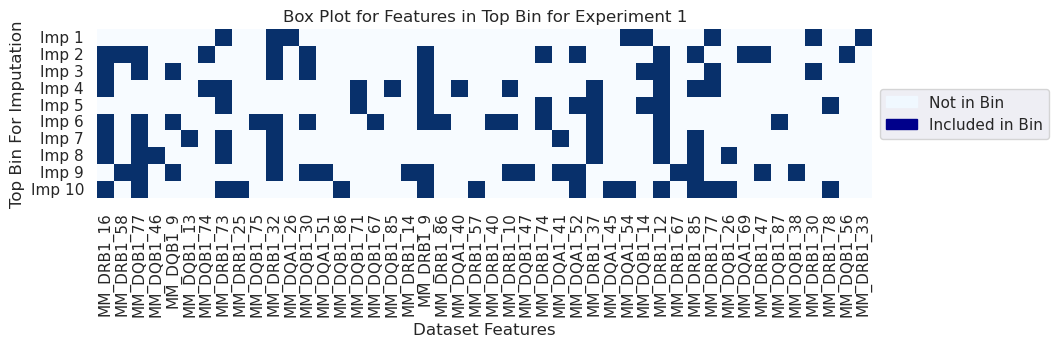

In [8]:
gdf = plot_bin_population_heatmap(population, feature_names,show=True,save=True,output_folder=experiment_folder,data_name='Experiment 1')

<AxesSubplot:title={'center':'Bargraph of AAMM Count in Top Bins in All Imps (Experiment 1)'}, xlabel='Dataset Feature', ylabel='Count in Top Bin'>

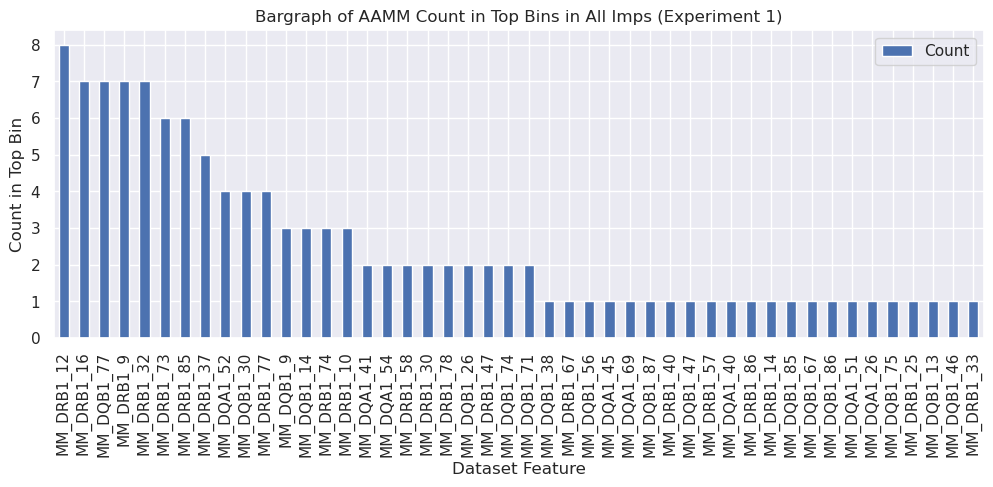

In [9]:
pd.DataFrame(gdf.sum(axis=0), 
             columns=['Count']).sort_values(
                 'Count', ascending=False).plot.bar(
                     figsize=(12, 4),
                     ylabel='Count in Top Bin',
                     xlabel='Dataset Feature',
                     title='Bargraph of AAMM Count in Top Bins in All Imps (Experiment 1)'
                     )

HERE


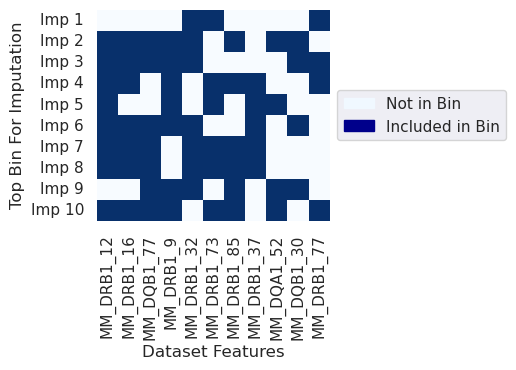

In [10]:
gdf = plot_bin_population_heatmap(population, feature_names,show=True,save=True,output_folder=experiment_folder,data_name='Experiment 1',filtering=True)

In [11]:
experiment_folder = './ASHI_Output_2/'

csv_list = sorted(list(glob.glob(experiment_folder+"*/Pop_*.csv")))
tdf = pd.read_csv(csv_list[0])

df = pd.DataFrame(columns=tdf.columns)
for imp in csv_list:
    tdf = pd.read_csv(imp)
    df = df.append(tdf.iloc[0],ignore_index=True)
display(df[['adj_HR', 'feature_list']])

dfd = df[['group_threshold', 'log_rank_score', 'group_strata_prop', 'adj_HR']].astype(float)
dfd.describe().T

,adj_HR,feature_list
0,1.083407,"['MM_DQB1_14', 'MM_DQB1_57', 'MM_DQB1_66', 'MM_DRB1_16', 'MM_DRB1_32', 'MM_DRB1_40', 'MM_DRB1_73', 'MM_DRB1_74', 'MM_DRB1_77', 'MM_DRB1_85', 'MM_DRB1_9', 'MM_DRB345_30', 'MM_DRB345_71']"
1,1.095378,"['MM_DQA1_26', 'MM_DQB1_74', 'MM_DQB1_75', 'MM_DQB1_86', 'MM_DRB1_14', 'MM_DRB1_16', 'MM_DRB1_30', 'MM_DRB1_32', 'MM_DRB1_77', 'MM_DRB1_85', 'MM_DRB345_30', 'MM_DRB345_86']"
2,1.100284,"['MM_DQB1_57', 'MM_DQB1_74', 'MM_DQB1_75', 'MM_DQB1_86', 'MM_DRB1_16', 'MM_DRB1_32', 'MM_DRB1_37', 'MM_DRB1_77', 'MM_DRB1_85', 'MM_DRB345_71', 'MM_DRB345_73']"
3,1.082474,"['MM_DQA1_51', 'MM_DQB1_37', 'MM_DQB1_74', 'MM_DQB1_77', 'MM_DRB1_32', 'MM_DRB1_37', 'MM_DRB1_58', 'MM_DRB1_74', 'MM_DRB1_9', 'MM_DRB345_30', 'MM_DRB345_73', 'MM_DRB345_76']"
4,1.088364,"['MM_DQB1_30', 'MM_DQB1_74', 'MM_DQB1_84', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_33', 'MM_DRB1_74', 'MM_DRB1_77', 'MM_DRB345_30', 'MM_DRB345_32', 'MM_DRB345_6']"
5,1.094198,"['MM_DQA1_26', 'MM_DQB1_30', 'MM_DQB1_46', 'MM_DQB1_75', 'MM_DRB1_16', 'MM_DRB1_33', 'MM_DRB1_67', 'MM_DRB1_73', 'MM_DRB345_71', 'MM_DRB345_77']"
6,1.099039,"['MM_DQA1_69', 'MM_DQB1_14', 'MM_DQB1_55', 'MM_DQB1_74', 'MM_DRB1_12', 'MM_DRB1_16', 'MM_DRB1_30', 'MM_DRB1_32', 'MM_DRB1_74', 'MM_DRB1_77', 'MM_DRB345_71']"
7,1.077525,"['MM_DQB1_30', 'MM_DQB1_52', 'MM_DRB1_32', 'MM_DRB1_58', 'MM_DRB1_73', 'MM_DRB1_74', 'MM_DRB1_85', 'MM_DRB1_9', 'MM_DRB345_67', 'MM_DRB345_71']"
8,1.093862,"['MM_DQA1_41', 'MM_DQA1_52', 'MM_DQB1_14', 'MM_DQB1_74', 'MM_DQB1_75', 'MM_DQB1_86', 'MM_DRB1_16', 'MM_DRB1_32', 'MM_DRB1_74', 'MM_DRB1_85', 'MM_DRB345_51', 'MM_DRB345_71']"
9,1.079109,"['MM_DQA1_80', 'MM_DQB1_38', 'MM_DQB1_52', 'MM_DQB1_86', 'MM_DRB1_16', 'MM_DRB1_77', 'MM_DRB1_85', 'MM_DRB345_6', 'MM_DRB345_71', 'MM_DRB345_85']"


,count,mean,std,min,25%,50%,75%,max
group_threshold,10.0,2.000000,1.054093,0.000000,2.000000,2.000000,2.000000,4.000000
log_rank_score,10.0,243.645243,16.114894,210.905484,236.365155,249.086583,251.504118,265.786643
group_strata_prop,10.0,0.374652,0.080450,0.256841,0.332358,0.358445,0.439973,0.495369
adj_HR,10.0,1.089364,0.008313,1.077525,1.082707,1.091113,1.095083,1.100284


In [12]:
# experiment_folder = './ASHI_Output_3/'

# csv_list = sorted(list(glob.glob(experiment_folder+"*/Pop_*.csv")))
# tdf = pd.read_csv(csv_list[0])

# df = pd.DataFrame(columns=tdf.columns)
# for imp in csv_list:
#     tdf = pd.read_csv(imp)
#     df = df.append(tdf.iloc[0],ignore_index=True)
# display(df[['feature_list']])

# df = df[['group_threshold', 'log_rank_score', 'group_strata_prop', 'adj_HR']].astype(float)
# df.describe().T

In [13]:
population = list()
for list_str in df['feature_list'].values:
    population.append(list_str.strip("[]").replace("'","").replace(" ","").split(','))
list_of_lists = population
set_of_lists = set()
for l in list_of_lists:
    for element in l:
        set_of_lists.add(element)
feature_names = list(set_of_lists)
# feature_names

HERE


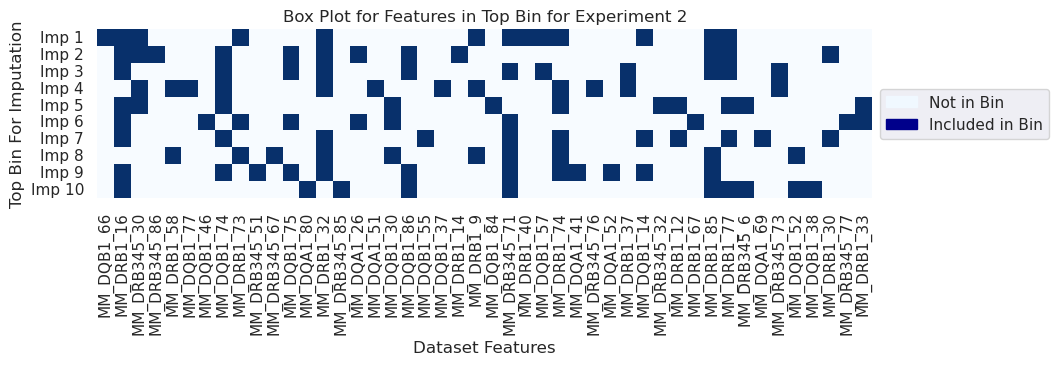

In [14]:
gdf = plot_bin_population_heatmap(population, feature_names,show=True,save=True,output_folder=experiment_folder,data_name='Experiment 2')

<AxesSubplot:title={'center':'Bargraph of AAMM Count in Top Bins in All Imps (Experiment 2)'}, xlabel='Dataset Feature', ylabel='Count in Top Bin'>

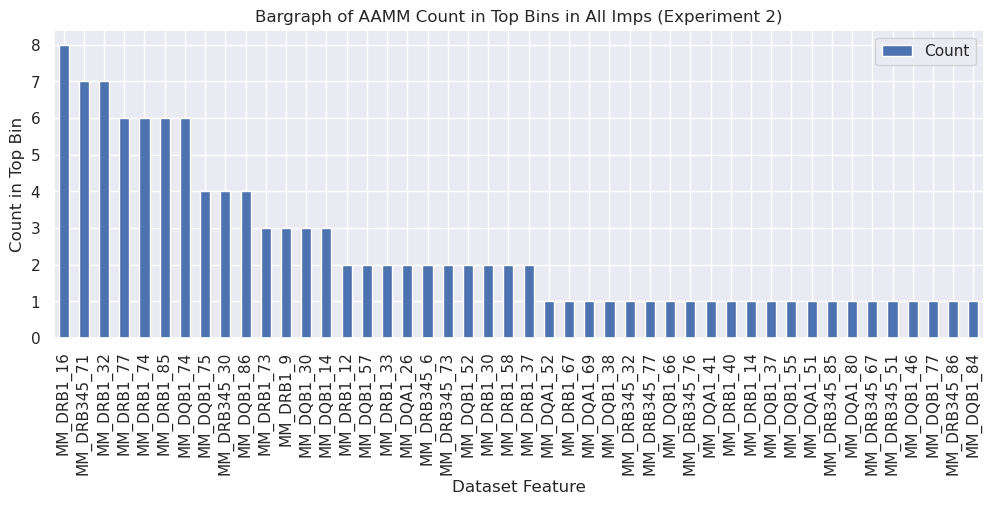

In [15]:
pd.DataFrame(gdf.sum(axis=0), 
             columns=['Count']).sort_values(
                 'Count', ascending=False).plot.bar(
                     figsize=(12, 4),
                     ylabel='Count in Top Bin',
                     xlabel='Dataset Feature',
                     title='Bargraph of AAMM Count in Top Bins in All Imps (Experiment 2)'
                     )

HERE


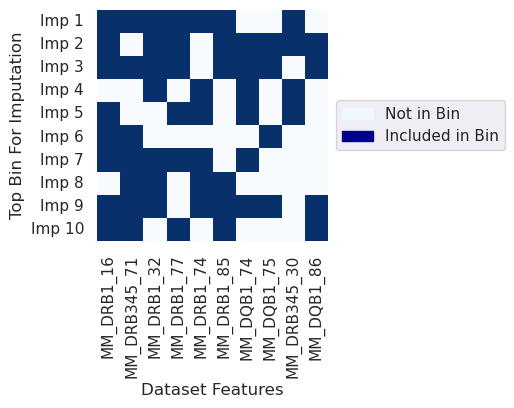

In [16]:
gdf = plot_bin_population_heatmap(population, feature_names,show=True,save=True,output_folder=experiment_folder,data_name='Experiment 2',filtering=True)